<h2 align = "center"> Classification Tree </h2>

## Some Important Terms

* Root node, inner node and leaf node
* Information gain: measure the change in the entropy due to the new information being added

* Handle nominal data: 2^(k-1)-1 combinations (think of putting k balls to 2 baskets)

* If the output is numeric, use RSS as the split critiria (variance) if it is categorical use either information gain (Gini, Entropy)

* Laplace smoothing is to add 2 to denominator and 1 to nominator

* Prepruning (specify how many observations should be in each leaf/or use hypothesis testing on the leaf node to see whether the information gain on the split is due to chance based on the p-value) and post-pruning (cost-complexity pruning add a panelty on the size of the nodes) [Use cross validation apply one penalty and then use cv to figure out the performance and repeate the process for all the possible penalty values, `rpart` has a cross-validation parameter]

* All the purity indexes have the weight for the number of records in each node compared to the total number of node. And the k of the index refers to the number of target labels.
* Remember the gini and entropy plots (entropy is higher than Gini)

* C4.5 and beyond start using information gain ratio (the information gain normalized by split information value [ represents the potential increase in information we get just by the size of the partitions themselves]) rather than information gain as information gain tends to have selection bias to favor the categorical variables. C5.0 also has a better way to prune the tree. Instead of eliminating nodes and subtrees, it can remove internal nodes but push up the the nodes beneath it and it can also has a cost matrix so thant the algorithm can avoid making certain types of misclassifications over others.

* Variable importance in the tree 
One interesting plot that we can obtain is a plot of variable importance . For every input feature, we keep track of the reduction in the optimization criterion (for example, deviance or SSE) that occurs every time it is used anywhere in the tree. We can then tally up this quantity for all the splits in the tree and thus obtain relative amounts of variable importance. Intuitively, features that are highly important will tend to have been used early to split the data (and hence appear higher up in the tree, closer to the root node) as well as more often. If a feature is never used, then it is not important and in this way we can see that we have a built-in feature selection.


  Strenghts     | Weakness
  ------------- | -------------
  1) Easy to explain <br/> 2) closer to human reasoning <br/>  3) display qualitively <br/>  4) handle qualitative predictors <br/>  5) can handle missing data as well (Igonre the missing during the training but use surrogate splits in prediction. When the optimal feature has missing value, we keep a list of the features that produce the similar splits and use these features to predict this observation) 6) Excludes unimportant features 7) can do the feature selection automatically| 1) Biased toward splits on features having a large number of levels <br />  2) Easy to overfit or underfit the model <br/> 3) have trouble modeling some relationships due to reliance on axis-parallel splits <br/> 4) small changes in the training data can result in large changes to decision logic 

## Visualization

* Tree model

* Partition of Instance space: Scatter plot on some pairs of features. It is good to compare different algorithms as well to see how each algorithm is 

* Importance of each attribute based on the information gain (won't be in the same order as the splitting as this is the global ranking not the local ranking )

## C5.0

In [6]:
setwd("E:/Personal/InterviewQuestion/Rscripts")
bnote = read.table("data_banknote_authentication.txt", sep = ",")
colnames(bnote) = c("waveletVar", "waveletSkew", "waveletCurt", "entropy","class")
bnote$class = as.factor(bnote$class)

In [7]:
library(caret)
library(dplyr)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [10]:
set.seed(19900830)
percentofTraining = 0.85

# Create the validation set and the training set
sampling_vector = createDataPartition(bnote$class, p = percentofTraining, list = FALSE)
# Get the label of the training set
bnote_train <- bnote[sampling_vector,]
bnote_train_labels <- bnote$class[sampling_vector]
# Get the label of the validation set
bnote_test_features <- bnote[-sampling_vector,] %>% select(-class)
bnote_test_labels <- bnote$class[-sampling_vector]

In [11]:
library(C50)
bnote_tree = C5.0 (class ~ ., data = bnote_train)
summary(bnote_tree)


Call:
C5.0.formula(formula = class ~ ., data = bnote_train)


C5.0 [Release 2.07 GPL Edition]  	Mon Jun 13 16:51:21 2016
-------------------------------

Class specified by attribute `outcome'

Read 1167 cases (5 attributes) from undefined.data

Decision tree:

waveletVar <= 0.31803:
:...waveletSkew > 6.1251:
:   :...waveletVar <= -3.4605: 1 (33/1)
:   :   waveletVar > -3.4605: 0 (79)
:   waveletSkew <= 6.1251:
:   :...waveletCurt <= 3.0423: 1 (262)
:       waveletCurt > 3.0423:
:       :...waveletSkew > -1.8624:
:           :...waveletVar <= -2.1652: 1 (3/1)
:           :   waveletVar > -2.1652: 0 (20)
:           waveletSkew <= -1.8624:
:           :...waveletVar <= -0.69078: 1 (155)
:               waveletVar > -0.69078:
:               :...entropy <= -0.73535: 0 (2)
:                   entropy > -0.73535: 1 (7)
waveletVar > 0.31803:
:...waveletCurt <= -4.3882:
    :...waveletSkew <= 6.9942: 1 (27)
    :   waveletSkew > 6.9942: 0 (9)
    waveletCurt > -4.3882:
    :...waveletVar > 

* The number in the parentheses means the number of observations from each class that are assigned to that node. 33/1 means that 33 reach the decision and 1 has been misclassified in that class
* The attribute usage is the importance of the variable

#### C5.0 could do the adaptive boosting

In [ ]:
bnote_tree = C5.0 (class ~ ., data = bnote_train, trials = 10) 
#the number of separate decision trees to use in the boosted team and the trials parameter sets an upper limit; the algorithm
#wil stop adding trees if it recofnizes that additional trials don't seem to be improving the accuracy

#### Make mistakes more costlier than others (cost matrix)

In [1]:
matrix_dimensions = list(c("no", "yes"), c("no", "yes"))

In [2]:
names(matrix_dimensions) = c("predicted", "actual")

In [3]:
error_cost = matrix(c(0,1,4,0), nrow =2, dimnames = matrix_dimensions)

In [ ]:
# Columns should correspond to the true classes and rows are the predicted classes. and it is opposite to the confusion matrix we see 

In [5]:
print(error_cost)

         actual
predicted no yes
      no   0   4
      yes  1   0


In [10]:
print(error_cost)

         actual
predicted no yes
      no   0   4
      yes  1   0


In [ ]:
bnote_cost = C5.0(class ~ ., data = bnote_train, costs = error_cost)

#### rules = TRUE to implement the classification rule

## RPart

In [12]:
library(rpart)

In [13]:
rpart.bnote <- rpart(
    formula = class ~ .,
    data    = bnote_train,
    weights = ,          # optional case weights.
    na.action  = na.rpart,  # By default, deleted if outcome is missing, kept if predictors are missing
    method     = "class",   # Classification for factor
    model      = FALSE,
    x          = FALSE,
    y          = TRUE,

    ## optional parameters for the splitting function
    parms = list(
        ## prior = c(0.5, 0.5), # prior probabilities. Defaults to observed data frequencies.
        loss = matrix(c(0,1,1,0), ncol = 2), # loss matrix. Penalize false positive or negative more heavily
        split = "information"      # gini or information
    ),

    ## rpart algorithm options (These are defaults, thus the whole control argument can be omitted)
    control = rpart.control(
        minsplit       = 20,   # minimum number of observations required before split or it is forced to a leaf node
        minbucket      = 20/3, # minimum number of observations in any terminal node. deault = minsplit/3
        cp             = 0.01, # complexity parameter used as the stopping rule
        maxcompete     = 4,    # number of competitor splits retained in the output
        maxsurrogate   = 5,    # number of surrogate splits retained in the output
        usesurrogate   = 2,    # how to use surrogates in the splitting process
        xval           = 10,   # number of cross-validations
        surrogatestyle = 0,    # controls the selection of a best surrogate
        maxdepth       = 30)   # maximum number of nodes between a leaf node and the root node
    ##,
    ## cost = c() # a vector of cost for each variable
    )

In [13]:
summary(rpart.bnote)

Call:
rpart(formula = class ~ ., data = bnote_train, na.action = na.rpart, 
    method = "class", model = FALSE, x = FALSE, y = TRUE, parms = list(loss = matrix(c(0, 
        1, 1, 0), ncol = 2), split = "information"), control = rpart.control(minsplit = 20, 
        minbucket = 20/3, cp = 0.01, maxcompete = 4, maxsurrogate = 5, 
        usesurrogate = 2, xval = 10, surrogatestyle = 0, maxdepth = 30))
  n= 1167 

          CP nsplit  rel error     xerror       xstd
1 0.68400771      0 1.00000000 1.00000000 0.03270909
2 0.09248555      1 0.31599229 0.31791908 0.02293364
3 0.05973025      2 0.22350674 0.23314066 0.02006577
4 0.04046243      3 0.16377649 0.19460501 0.01850702
5 0.01830443      5 0.08285164 0.11560694 0.01453606
6 0.01000000      7 0.04624277 0.08285164 0.01239980

Variable importance
 waveletVar waveletSkew waveletCurt     entropy 
         47          26          16          11 

Node number 1: 1167 observations,    complexity param=0.6840077
  predicted class=0  expecte

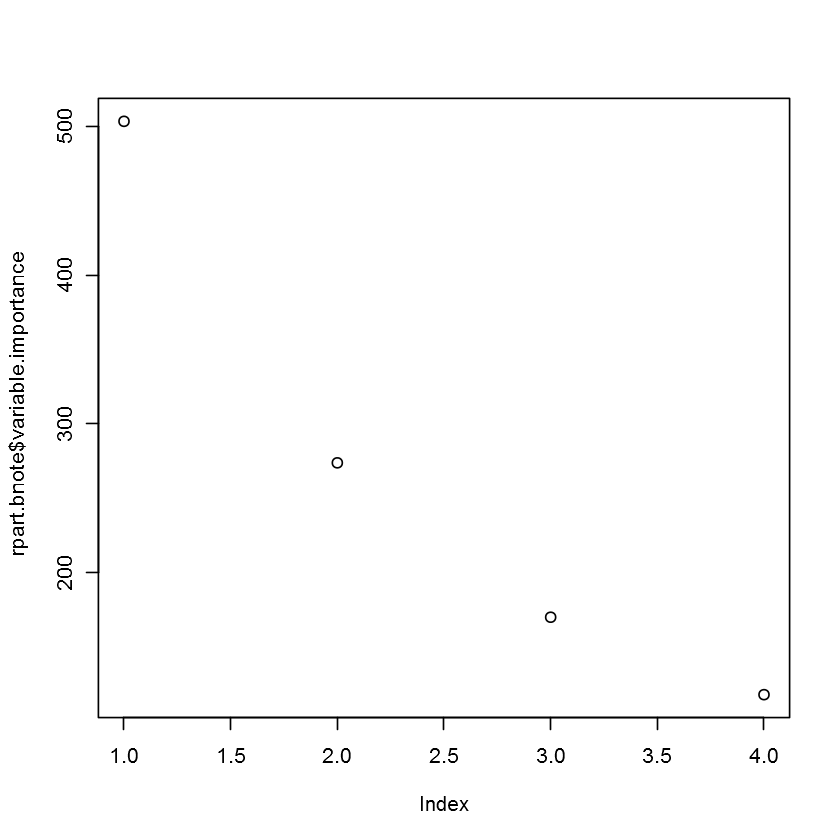

In [15]:
plot(rpart.bnote$variable.importance)